## Confidence Interval
We will now estimate the Population mean with Confidence Interval because we can't say it is 100% correct.  
We have only one sample out of Population. Some thousands girls data out of million girls in Countary.  
We have two cases:
* We know the Population Standard Deviation
* We don't know the Population Standard Deviation  

We will use Black Friday dataset: [blackfriday](
https://www.kaggle.com/llopesolivei/blackfriday)

### data description
We are using Black Friday data. Our goal is to estimate the average money spent by Male population on black friday.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random

In [3]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import FloatSlider,IntSlider,Combobox

In [5]:
df = pd.read_csv('/home/mayur/Downloads/PGDUOH/Python_UOH/Sem2_Notebooks/BlackFriday.csv')
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [35]:
Population_data = df[df['Gender']=='M']['Purchase'].values
Population_data = np.array(Population_data)

Population_mean = np.mean(Population_data)
print("Population mean: ", Population_mean)
Population_stdev = np.std(Population_data)
print("Population standard deviation: ", Population_stdev)

# We can not get value of all males and we have only 100 observations
samples = random.sample(range(0,len(Population_data)),100)
Sample_data = Population_data[samples]

Population mean:  9504.771712960679
Population standard deviation:  5051.051025629941


### 1. We know the Population Standard Deviation
We can estimate the Populatoin mean between x̅-2σ/√n and x̅+2σ/√n where,  
 σ is Population Standard Deviation and x̅ is Sample mean and n is the sample size.

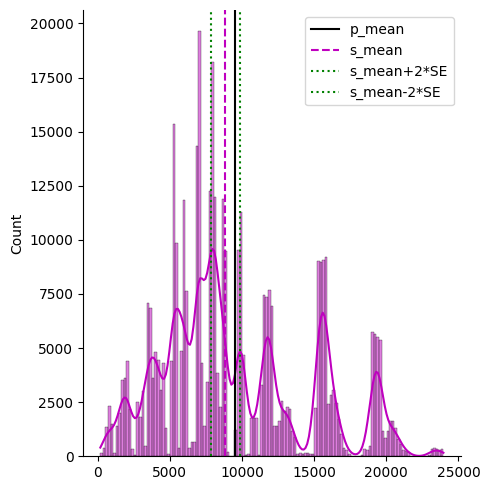

In [47]:
sample_size = 100
samples = random.sample(range(0,len(Population_data)),sample_size)
Sample_data = Population_data[samples]
sample_mean_x_bar = np.mean(Sample_data)
error = 2*(Population_stdev/np.sqrt(sample_size)) 
lower_CI = sample_mean_x_bar - error
upper_CI = sample_mean_x_bar + error

#Just for fun we take random color everytime
colrs = ['r','g','b','y', 'c', 'm', 'k']
sns.displot(Population_data, color = colrs[random.randint(0,6)], kde=True)
plt.axvline(Population_mean, linestyle="-", color='k', label="p_mean")
plt.axvline(sample_mean_x_bar, linestyle="--", color='m', label="s_mean")
plt.axvline(lower_CI, linestyle=":", color='g', label="s_mean+2*SE")
plt.axvline(upper_CI, linestyle=":", color='g', label="s_mean-2*SE")
plt.legend()

In [62]:
def confidence_interval_1(S_size=100, Pop_stdev_isknown = True):
    '''
    Plot confidence interval in case of we know the population standard deviation.
    It takes sample size parameter.
    It uses the global variables for Population.
    It plots the displot and Confidence Interval.
    '''
    sample_size = S_size
    samples = random.sample(range(0,len(Population_data)),sample_size)
    Sample_data = Population_data[samples]
    sample_mean_x_bar = np.mean(Sample_data)

    if Pop_stdev_isknown:
    error = 2*(Population   dev/np.sqrt(sample_size)) 
    lower_CI = sample_mean_x_bar - error
    upper_CI = sample_mean_x_bar + error

    #Just for fun we take random color everytime
    colrs = ['r','g','b','y', 'c', 'm', 'k']
    sns.displot(Population_data, color = colrs[random.randint(0,6)], kde=True)
    plt.axvline(Population_mean, linestyle="-", color='k', label="p_mean: "+str(round(Population_mean,3)))
    plt.axvline(sample_mean_x_bar, linestyle="--", color='m', label="s_mean: "+str(round(sample_mean_x_bar,3)))
    plt.axvline(lower_CI, linestyle=":", color='g', label="lower_CI: "+str(round(lower_CI,3)))
    plt.axvline(upper_CI, linestyle=":", color='g', label "+str(round(upper_CI,3)))
    plt.title('Estimating mean with 95% Confidence Interval')
    plt.legend()

In [65]:
w1_with_pop_mean = interactive(confidence_interval_1,{'manual': True},S_size = IntSlider(value=100,min=10,max=1000,step=5, continuous_update=False), P_stdev_known = True)

In [64]:
display(w1_with_pop_mean)

interactive(children=(IntSlider(value=100, continuous_update=False, description='S_size', max=1000, min=10, st…